The report with 10 datasets that work for both **TF-IDF** and **SGNS**:

---

# 🔟 Text Datasets (usable for both TF-IDF & SGNS)

| #  | Dataset                 | Size                     | Highlights                                        | Link                                                                                                               |
| -- | ----------------------- | ------------------------ | ------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------ |
| 1  | **Penn Treebank (PTB)** | \~1M tokens / 10k vocab  | Classic small corpus, language modeling benchmark | [PTB via TorchText](https://pytorch.org/text/stable/datasets.html#penn-treebank)                                   |
| 2  | **Text8**               | 17M tokens / \~71k vocab | Wikipedia 100MB excerpt, standard for word2vec    | [Text8](http://mattmahoney.net/dc/textdata.html)                                                                   |
| 3  | **WikiText-2**          | 2M tokens / 33k vocab    | Natural text, long-tail distribution              | [WikiText-2](https://blog.salesforceairesearch.com/the-wikitext-long-term-dependency-language-modeling-dataset/)   |
| 4  | **WikiText-103**        | 103M tokens / 267k vocab | Large version, stronger embeddings                | [WikiText-103](https://blog.salesforceairesearch.com/the-wikitext-long-term-dependency-language-modeling-dataset/) |
| 5  | **20 Newsgroups**       | \~20k docs               | 20 topic categories, classic text classification  | [20 Newsgroups](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html)                                     |
| 6  | **Reuters-21578**       | 21,578 docs              | Newswire articles, finance domain                 | [Reuters-21578](https://archive.ics.uci.edu/ml/datasets/reuters-21578-text-categorization-collection)              |
| 7  | **IMDB Reviews**        | 50k reviews              | Sentiment analysis benchmark                      | [IMDB](https://ai.stanford.edu/~amaas/data/sentiment/)                                                             |
| 8  | **AG News**             | 120k docs                | Clean news classification dataset                 | [AG News (Kaggle)](https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset)                    |
| 9  | **DBpedia Ontology**    | 630k docs                | Wikipedia entity descriptions, multi-class        | [DBpedia](https://wiki.dbpedia.org/services-resources/datasets/dbpedia-datasets)                                   |
| 10 | **Yahoo! Answers**      | 1.4M docs                | QA corpus across broad topics                     | [Yahoo Answers](https://www.kaggle.com/datasets/bhavikardeshna/yahoo-email-classification?resource=download)                                         |

---

## 🔧 Usage Recommendation

* **Small-scale, quick tests**: PTB, Text8, WikiText-2, 20 Newsgroups
* **Medium-scale benchmarks**: Reuters-21578, IMDB, AG News
* **Large-scale evaluation**: WikiText-103, DBpedia, Yahoo Answers

Each dataset provides **document boundaries** (for TF-IDF) and **token sequences** (for SGNS), making them suitable for both paradigms.

---




# 📘 Building a Positive Co-occurrence Matrix for SGNS & TF-IDF

This Python script constructs a **positive co-occurrence matrix** from text data, where:

* $\#(w,c)$: counts how often a **target word** $w$ appears with a **context word** $c$ within a symmetric window.
* **Row sums**: $\#(w) = \sum_c \#(w,c)$, total co-occurrences for a target word.
* **Column sums**: $\#(c) = \sum_w \#(w,c)$, total co-occurrences for a context word.
* **Noise distribution** $P_n(c)$:

  * Basic: $P_n(c) = \frac{\#(c)}{\sum_{c'} \#(c')}$
  * word2vec style: $P_n(c) \propto \#(c)^{\alpha}$ with $\alpha=0.75$.

This setup is useful for training **SGNS (Skip-Gram with Negative Sampling)** while also being compatible with **TF-IDF (Term Frequency–Inverse Document Frequency)** experiments.

---

## 📊 Key Points

* **Positive Co-occurrence Matrix $M$**:
  $M[w,c] = \#(w,c)$, counts of target–context pairs within a window.

* **Row sums & column sums**:

  * $\#(w)$: total co-occurrences for target word $w$.
  * $\#(c)$: total co-occurrences for context word $c$.

* **Noise distribution $P_n$**:

  * **Naive**: $P_n(c) = \#(c)/\sum_{c'} \#(c')$.
  * **word2vec style**: $P_n(c) \propto \#(c)^{0.75}$.

---


Top co-occurrence pairs:
   target_word context_word  count
0         york          new    990
1          new         york    990
2           mr         said    686
3         said           mr    686
4      billion      billion    648
5        cents        share    642
6        share        cents    642
7      earlier         year    574
8         year      earlier    574
9        third      quarter    531
10     quarter        third    531
11        days         days    492
12     company         said    490
13        said      company    490
14          mr         says    413
15        says           mr    413
16        last         year    400
17        year         last    400
18       stock     exchange    372
19    exchange        stock    372


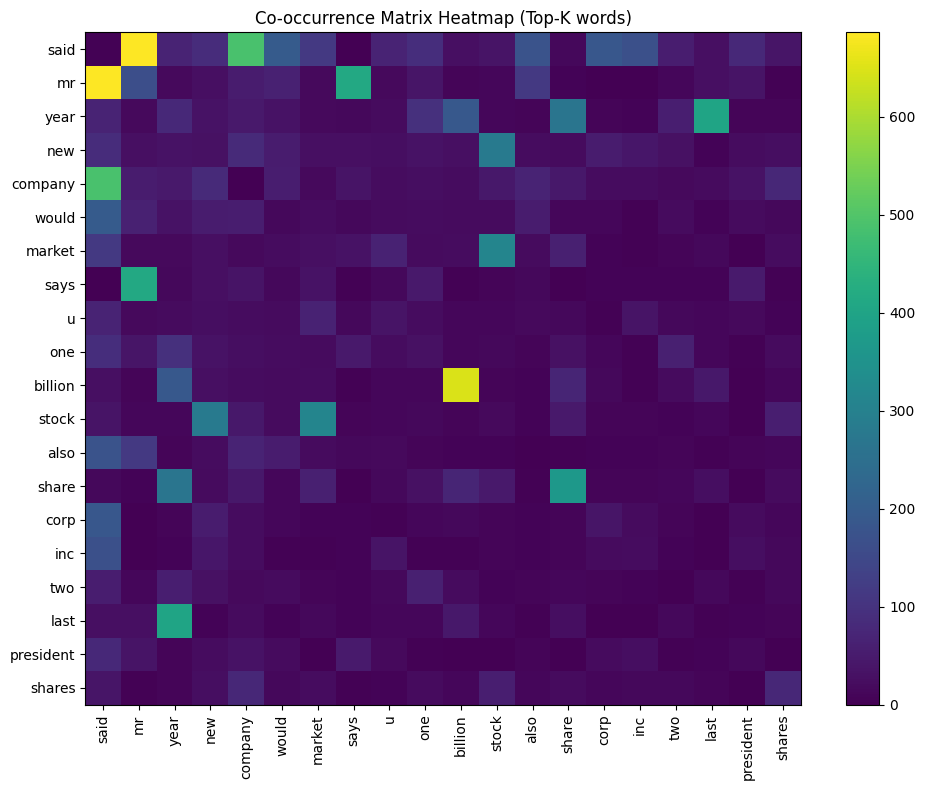

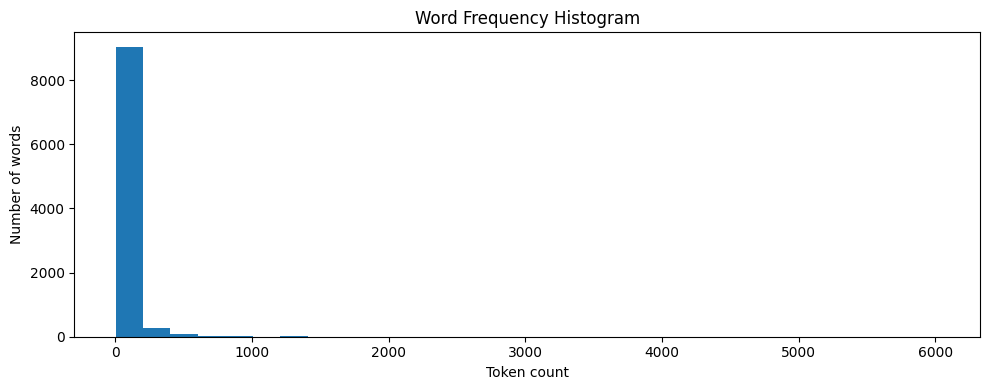


Pn(c) naive (first 10): [0.012814 0.008373 0.00616  0.006263 0.005678 0.005442 0.004529 0.004447
 0.004373 0.00401 ]
Pn(c) alpha=0.75 (first 10): [0.004739 0.003444 0.002736 0.00277  0.002574 0.002493 0.002172 0.002143
 0.002116 0.001983]
Top co-occurrences with context='bond':
  (junk, bond) = 109
  (market, bond) = 74
  (prices, bond) = 55
  (year, bond) = 32
  (corp, bond) = 31
  (num, bond) = 27
  (due, bond) = 20
  (funds, bond) = 18
  (offering, bond) = 18
  (stock, bond) = 17
  (investors, bond) = 17
  (rose, bond) = 17
  (said, bond) = 16
  (yield, bond) = 16
  (ended, bond) = 16
  (issue, bond) = 15
  (carries, bond) = 14
  (one, bond) = 13
  (fund, bond) = 11
  (benchmark, bond) = 11
  (fell, bond) = 10
  (treasury, bond) = 10
  (point, bond) = 10
  (mr, bond) = 9
  (new, bond) = 8
  (analysts, bond) = 8
  (markets, bond) = 8
  (issues, bond) = 8
  (portfolio, bond) = 8
  (holdings, bond) = 8


In [25]:
# -*- coding: utf-8 -*-
# Build co-occurrence matrix, list (w,c) counts, show heatmap & word frequency histogram.
# You can replace the `docs` list with your own corpus.

import re
from collections import Counter
from typing import List, Dict, Tuple
import numpy as np
import pandas as pd
from scipy.sparse import coo_matrix, csr_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# ===================== 1) Tokenizer & Vocab =====================
stop_words = set(stopwords.words("english"))

def simple_tokenize(text: str, keep_num_token=True) -> List[str]:
    """朴素英文分词：小写，仅保留字母，去掉停用词。"""
    text = text.lower()
    if keep_num_token:
        # 把连续数字替换为 <num>
        text = re.sub(r"\d+", " <num> ", text)
        # 只保留字母、空格和尖括号/斜杠（为了 <num>）
        text = re.sub(r"[^a-z\s<>/]+", " ", text)
    else:
        text = re.sub(r"[^a-z\s]+", " ", text)
    text = re.sub(r"[^a-z]+", " ", text)
    toks = text.strip().split()
    return [t for t in toks if t not in stop_words]

def build_vocab_from_docs(docs: List[str], min_freq: int = 1,
                          drop_tokens={"unk","n","million"}) -> Tuple[Dict[str,int], List[str], Counter]:
    """
    建立词表（按频次降序），返回 tok2idx, idx2tok, unigram_counts。
    """
    cnt = Counter()
    for d in docs:
        cnt.update(simple_tokenize(d))
    # 删除指定token
    for tok in drop_tokens:
        if tok in cnt:
            del cnt[tok]
    items = [(w, f) for w, f in cnt.items() if f >= min_freq]
    items.sort(key=lambda x: (-x[1], x[0]))
    idx2tok = [w for w, _ in items]
    tok2idx = {w:i for i, w in enumerate(idx2tok)}
    return tok2idx, idx2tok, cnt



# ===================== 2) Co-occurrence Matrix (positive pairs) =====================

def build_positive_matrix(
    docs: List[str],
    tok2idx: Dict[str,int],
    window: int = 5,
    dynamic_window: bool = False
) -> Tuple[csr_matrix, np.ndarray, np.ndarray]:
    """
    构造正样本共现矩阵 M，M[w,c] = #(w,c)
    - window: 对称窗口大小（5 表示左右各取最多5个词）
    - dynamic_window: 若 True，对每个中心词随机取 [1..window] 的窗口（更贴近 SGNS）
    返回：
      M_csr: 稀疏矩阵 (|V| x |V|)
      row_sums: #(w) = sum_c M[w,c]
      col_sums: #(c) = sum_w M[w,c]
    """
    rows, cols, data = [], [], []
    V = len(tok2idx)

    for doc in docs:
        ids = [tok2idx[t] for t in simple_tokenize(doc) if t in tok2idx]
        n = len(ids)
        if n == 0:
            continue
        for i, w in enumerate(ids):
            W = np.random.randint(1, window+1) if dynamic_window else window
            left, right = max(0, i - W), min(n, i + W + 1)
            for j in range(left, right):
                if j == i:
                    continue
                c = ids[j]
                rows.append(w); cols.append(c); data.append(1)

    if len(data) == 0:
        M = csr_matrix((V, V), dtype=np.int64)
    else:
        M = coo_matrix((np.array(data, dtype=np.int64),
                        (np.array(rows, dtype=np.int64), np.array(cols, dtype=np.int64))),
                       shape=(V, V)).tocsr()

    row_sums = np.asarray(M.sum(axis=1)).reshape(-1)
    col_sums = np.asarray(M.sum(axis=0)).reshape(-1)
    return M, row_sums, col_sums


def get_top_cooccurrences_for_context(M, tok2idx, idx2tok, context_word, topk=20,
                                      exclude={"unk","n","million"}):
    """
    给定一个 context_word，返回 (w, count) 排序结果。
    - M: 共现矩阵 (csr_matrix)，M[w,c] = #(w,c)
    - tok2idx / idx2tok: 词表
    - context_word: 要查询的上下文词
    - topk: 返回前多少个目标词
    """
    if context_word not in tok2idx:
        print(f"'{context_word}' not in vocab")
        return []
    c_id = tok2idx[context_word]
    # 从稀疏矩阵取出该列
    col = M[:, c_id].toarray().reshape(-1)
    # 找出非零的 (w, count)
    pairs = [(idx2tok[w_id], int(cnt)) 
             for w_id, cnt in enumerate(col) 
             if cnt > 0 and idx2tok[w_id] not in exclude]
    # 按频数降序排序
    pairs.sort(key=lambda x: -x[1])
    return pairs[:topk]


# ===================== 3) Noise distribution Pn(c) =====================

def pn_from_col_sums(col_sums: np.ndarray) -> np.ndarray:
    """Pn(c) = #(c)/sum_c #(c)"""
    total = col_sums.sum()
    return col_sums / total if total > 0 else np.ones(len(col_sums)) / max(1, len(col_sums))

def pn_power(col_sums: np.ndarray, alpha: float = 0.75) -> np.ndarray:
    """word2vec 风格：Pn(c) ∝ #(c)^alpha"""
    x = np.power(col_sums.astype(float), alpha)
    s = x.sum()
    return x / s if s > 0 else np.ones(len(x)) / max(1, len(x))

# ===================== 4) Demo corpus =====================

from torchtext.datasets import PennTreebank, WikiText2

# Penn Treebank
train_iter = PennTreebank(split='train')
docs = list(train_iter)   # 每个元素是一句

# ===================== 5) Build everything =====================

if __name__ == "__main__":
    # 参数可改
    WINDOW = 2
    DYNAMIC = False
    TOPK = 20  # 热力图选取的高频词数量

    # 词表 & 矩阵
    tok2idx, idx2tok, unigram_counts = build_vocab_from_docs(docs, min_freq=1)
    M, row_sums, col_sums = build_positive_matrix(docs, tok2idx, window=WINDOW, dynamic_window=DYNAMIC)

    # ===== 5.1 (w,c,count) 详表 =====
    r_idx, c_idx = M.nonzero()
    counts = M.data
    pair_df = pd.DataFrame({
        "target_word": [idx2tok[r] for r in r_idx],
        "context_word": [idx2tok[c] for c in c_idx],
        "count": counts.astype(int)
    }).sort_values("count", ascending=False).reset_index(drop=True)
    print("\nTop co-occurrence pairs:")
    print(pair_df.head(20))

    # （可选）保存到文件
    # pair_df.to_csv("wc_pairs_counts.csv", index=False, encoding="utf-8")

    # ===== 5.2 共现矩阵热力图（Top-K 词）=====
    # 选TOPK个最常见词（按unigram）
    top_words = [w for w, _ in Counter({w: unigram_counts[w] for w in idx2tok}).most_common(min(TOPK, len(idx2tok)))]
    top_ids = [tok2idx[w] for w in top_words]
    subM = M[top_ids, :][:, top_ids].toarray()

    plt.figure(figsize=(10, 8))
    plt.imshow(subM, aspect='auto')
    plt.colorbar()
    plt.xticks(ticks=np.arange(len(top_words)), labels=top_words, rotation=90)
    plt.yticks(ticks=np.arange(len(top_words)), labels=top_words)
    plt.title("Co-occurrence Matrix Heatmap (Top-K words)")
    plt.tight_layout()
    plt.show()

    # ===== 5.3 词频直方图 =====
    freqs = np.array([unigram_counts[w] for w in idx2tok], dtype=np.int64)
    bins = min(30, max(5, int(np.sqrt(len(freqs)))))

    plt.figure(figsize=(10, 4))
    plt.hist(freqs, bins=bins)
    plt.title("Word Frequency Histogram")
    plt.xlabel("Token count")
    plt.ylabel("Number of words")
    plt.tight_layout()
    plt.show()

    # ===== 5.4 打印 Pn(c) 示例 =====
    Pn_naive = pn_from_col_sums(col_sums)
    Pn_075   = pn_power(col_sums, alpha=0.75)
    print("\nPn(c) naive (first 10):", np.round(Pn_naive[:10], 6))
    print("Pn(c) alpha=0.75 (first 10):", np.round(Pn_075[:10], 6))

    # （可选）导出矩阵与词频
    # from scipy.sparse import save_npz
    # save_npz("cooc_matrix.npz", M)
    # pd.DataFrame({"word": idx2tok, "freq": freqs}).to_csv("unigram_freq.csv", index=False, encoding="utf-8")

    # 使用示例
    context_word = "bond"
    results = get_top_cooccurrences_for_context(M, tok2idx, idx2tok, context_word, topk=30)

    print(f"Top co-occurrences with context='{context_word}':")
    for w, cnt in results:
        print(f"  ({w}, {context_word}) = {cnt}")


# Penn Treebank (PTB)
### Classic small corpus, language modeling benchmark

In [24]:
from torchtext.datasets import PennTreebank, WikiText2

# Penn Treebank
train_iter = PennTreebank(split='train')
docs = list(train_iter)   # 每个元素是一句
docs

['aer banknote berlitz calloway centrust cluett fromstein gitano guterman hydro-quebec ipo kia memotec mlx nahb punts rake regatta rubens sim snack-food ssangyong swapo wachter',
 'pierre <unk> N years old will join the board as a nonexecutive director nov. N',
 'mr. <unk> is chairman of <unk> n.v. the dutch publishing group',
 'rudolph <unk> N years old and former chairman of consolidated gold fields plc was named a nonexecutive director of this british industrial conglomerate',
 'a form of asbestos once used to make kent cigarette filters has caused a high percentage of cancer deaths among a group of workers exposed to it more than N years ago researchers reported',
 'the asbestos fiber <unk> is unusually <unk> once it enters the <unk> with even brief exposures to it causing symptoms that show up decades later researchers said',
 '<unk> inc. the unit of new york-based <unk> corp. that makes kent cigarettes stopped using <unk> in its <unk> cigarette filters in N',
 "although prelimina

# Text8
### Wikipedia 100MB excerpt, standard for word2vec

In [27]:
import requests, zipfile, io

url = "http://mattmahoney.net/dc/text8.zip"
resp = requests.get(url)
with zipfile.ZipFile(io.BytesIO(resp.content)) as z:
    text8 = z.read("text8").decode("utf-8")

# Text8 是一个 100MB 的连续字符串，没有句子边界
# 这里把它切成小块，每块1000词，作为一条“文档”
tokens = text8.split()
docs = [" ".join(tokens[i:i+1000]) for i in range(0, len(tokens), 1000)]
print(len(docs), "docs,", "example:", docs[0][:200])


17006 docs, example: anarchism originated as a term of abuse first used against early working class radicals including the diggers of the english revolution and the sans culottes of the french revolution whilst the term i


In [28]:
docs

['anarchism originated as a term of abuse first used against early working class radicals including the diggers of the english revolution and the sans culottes of the french revolution whilst the term is still used in a pejorative way to describe any act that used violent means to destroy the organization of society it has also been taken up as a positive label by self defined anarchists the word anarchism is derived from the greek without archons ruler chief king anarchism as a political philosophy is the belief that rulers are unnecessary and should be abolished although there are differing interpretations of what this means anarchism also refers to related social movements that advocate the elimination of authoritarian institutions particularly the state the word anarchy as most anarchists use it does not imply chaos nihilism or anomie but rather a harmonious anti authoritarian society in place of what are regarded as authoritarian political structures and coercive economic institut

# WikiText-2

In [31]:
from torchtext.datasets import WikiText2
train_iter = WikiText2(split='train')
docs = [line for line in train_iter if line.strip()]
print(len(docs), "docs,", "example:", docs[0][:200])

HTTPError: 403 Client Error: Forbidden for url: https://s3.amazonaws.com/research.metamind.io/wikitext/wikitext-2-v1.zip
This exception is thrown by __iter__ of HTTPReaderIterDataPipe(skip_on_error=False, source_datapipe=OnDiskCacheHolderIterDataPipe, timeout=None)

This is due to the fact that the download links for the early versions of torchtext.datasets.WikiText2/WikiText103 (on research.metamind.io at S3) have been deprecated.

# 20 Newsgroups
### 20 topic categories, classic text classification

In [44]:
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(subset='train',
                             remove=('headers','footers','quotes'))
docs = dataset.data
print(len(docs), "docs,", "example:", docs[0][:200])

11314 docs, example: I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were 


In [45]:
docs

['I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.',
 "A fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy disk\nfunctionality with 800 and 1.4 m floppies are especially requested.\n\nI will be summarizing in the next two days, so please add to the network\nknowledge base if you have done the clock upgrade and haven't an

# Reuters-21578
### Newswire articles, finance domain 

In [46]:
from nltk.corpus import reuters
import nltk
nltk.download("reuters")

docs = [reuters.raw(fileid) for fileid in reuters.fileids()]
print(len(docs), "docs,", "example:", docs[0][:200])


[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\m1830\AppData\Roaming\nltk_data...


10788 docs, example: ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT
  Mounting trade friction between the
  U.S. And Japan has raised fears among many of Asia's exporting
  nations that the row could inflict far-reachin


In [47]:
docs

['ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT\n  Mounting trade friction between the\n  U.S. And Japan has raised fears among many of Asia\'s exporting\n  nations that the row could inflict far-reaching economic\n  damage, businessmen and officials said.\n      They told Reuter correspondents in Asian capitals a U.S.\n  Move against Japan might boost protectionist sentiment in the\n  U.S. And lead to curbs on American imports of their products.\n      But some exporters said that while the conflict would hurt\n  them in the long-run, in the short-term Tokyo\'s loss might be\n  their gain.\n      The U.S. Has said it will impose 300 mln dlrs of tariffs on\n  imports of Japanese electronics goods on April 17, in\n  retaliation for Japan\'s alleged failure to stick to a pact not\n  to sell semiconductors on world markets at below cost.\n      Unofficial Japanese estimates put the impact of the tariffs\n  at 10 billion dlrs and spokesmen for major electronics firms\n  said they would 

# IMDB Reviews

In [52]:
import tensorflow_datasets as tfds
ds = tfds.load("imdb_reviews", split="train", as_supervised=True)

docs = [text.numpy().decode("utf-8") for text, label in ds]
print(len(docs), "docs,", "example:", docs[0][:200])




***************************************************************
Failed to import TensorFlow. Please note that TensorFlow is not installed by default when you install TFDS. This allows you to choose to install either `tf-nightly` or `tensorflow`. Please install the most recent version of TensorFlow, by following instructions at https://tensorflow.org/install.
***************************************************************




ImportError: Failed to construct dataset "imdb_reviews", builder_kwargs "{'data_dir': None}": cannot import name 'defun_with_attributes' from 'tensorflow.python.eager.function' (d:\Python\lib\site-packages\tensorflow\python\eager\function.py)

# AG News
### Clean news classification dataset 

In [ ]:
import pandas as pd

url_train = "https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv"
url_test  = "https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/test.csv"

# AG News CSV 格式： label, title, description
train_df = pd.read_csv(url_train, header=None, names=["label","title","text"])
test_df  = pd.read_csv(url_test,  header=None, names=["label","title","text"])

# 拼接 title + text 作为文档
docs = (train_df["title"] + " " + train_df["text"]).tolist()

print(len(docs), "docs,", "example:", docs[0][:200])


120000 docs, example: Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.


In [61]:
docs

["Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again.",
 'Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\\which has a reputation for making well-timed and occasionally\\controversial plays in the defense industry, has quietly placed\\its bets on another part of the market.',
 "Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries\\about the economy and the outlook for earnings are expected to\\hang over the stock market next week during the depth of the\\summer doldrums.",
 'Iraq Halts Oil Exports from Main Southern Pipeline (Reuters) Reuters - Authorities have halted oil export\\flows from the main pipeline in southern Iraq after\\intelligence showed a rebel militia could strike\\infrastructure, an oil official said on Saturday.',
 'Oil prices soar to all-time record, posing new menace to US economy (A

# DBpedia Ontology
### Wikipedia entity descriptions, multi-class 

In [67]:
import datasets
dbpedia = datasets.load_dataset("dbpedia_14", split="train")

docs = [item["content"] for item in dbpedia]
print(len(docs), "docs,", "example:", docs[0][:200])


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/560000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/70000 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to file://C:/Users/m1830/.cache/huggingface/datasets/parquet/dbpedia_14-d471ccb26b3c037d/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


NotImplementedError: Loading a dataset cached in a LocalFileSystem is not supported.

# Yahoo! Answers
### QA corpus across broad topics
https://www.kaggle.com/datasets/bhavikardeshna/yahoo-email-classification?resource=download

In [79]:
import pandas as pd
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [81]:
df_train.head(5)

5 why doesn't an optical mouse work on a glass table?  \
0  6       What is the best off-road motorcycle trail ?    
1  3             What is Trans Fat? How to reduce that?    
2  7                         How many planes Fedex has?    
3  7  In the san francisco bay area, does it make se...    
4  5           What's the best way to clean a keyboard?    

                           or even on some surfaces?  \
0                  long-distance trail throughout CA   
1  I heard that tras fat is bad for the body.  Wh...   
2  I heard that it is the largest airline in the ...   
3  the prices of rent and the price of buying doe...   
4  I have very small stuff stuck under my keyboar...   

  Optical mice use an LED and a camera to rapidly capture images of the surface beneath the mouse.  The infomation from the camera is analyzed by a DSP (Digital Signal Processor) and used to detect imperfections in the underlying surface and determine motion. Some materials, such as glass, mirrors or other very shiny, uniform surfaces interfere with the ability of the DSP to accurately analyze the surface beneath the mouse.  \nSince glass is transparent and very uniform, the mouse is unable to pick up enough imperfections in the underlying surface to determine motion.  Mirrored surfaces are also a problem, since they constantly reflect back the same image, causing the DSP not to recognize motion properly. When the system is unable to see surface changes associated with movement, the mouse will not work properly.  
0  i hear that the mojave road is amazing!<br />\...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
1  Trans fats occur in manufactured foods during ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
2  according to the www.fedex.com web site:\nAir ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
3

In [82]:
df_test.head(5)

9                       What makes friendship click?  \
0  2                      Why does Zebras have stripes?   
1  4           What did the itsy bitsy sipder climb up?   
2  4  What is the difference between a Bachelors and...   
3  3                              Why do women get PMS?   
4  3  If your co-worker is guilty of unsanitary hygi...   

                      How does the spark keep going?  \
0  What is the purpose or those stripes? Who do t...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

  good communication is what does it.  Can you move beyond small talk and say what's really on your mind.  If you start doing this, my expereince is that potentially good friends will respond or shun you.  Then you know who the really good friends are.  
0  this provides camouflage - predator vision is ...                                                                                                                                                                                                          
1                                         waterspout                                                                                                                                                                                                          
2  One difference between a Bachelors and a Maste...                                                                                                                                                                                                          
3  Premenstrual syndrome (PMS) is a group of symp...                                                                                                                                                                                                          
4  Yes, it is your obligation. Especially if it i...

# Available datasets


| #  | Dataset                 | Size                     | Highlights                                        | Link                                                                                                               |
| -- | ----------------------- | ------------------------ | ------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------ |
| 1  | **Penn Treebank (PTB)** | \~1M tokens / 10k vocab  | Classic small corpus, language modeling benchmark | [PTB via TorchText](https://pytorch.org/text/stable/datasets.html#penn-treebank)                                   |
| 2  | **Text8**               | 17M tokens / \~71k vocab | Wikipedia 100MB excerpt, standard for word2vec    | [Text8](http://mattmahoney.net/dc/textdata.html)                                                                   |
| 4  | **WikiText-103**        | 103M tokens / 267k vocab | Large version, stronger embeddings                | [WikiText-103](https://blog.salesforceairesearch.com/the-wikitext-long-term-dependency-language-modeling-dataset/) |
| 5  | **20 Newsgroups**       | \~20k docs               | 20 topic categories, classic text classification  | [20 Newsgroups](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html)                                     |
| 6  | **Reuters-21578**       | 21,578 docs              | Newswire articles, finance domain                 | [Reuters-21578](https://archive.ics.uci.edu/ml/datasets/reuters-21578-text-categorization-collection)              |
| 8  | **AG News**             | 120k docs                | Clean news classification dataset                 | [AG News (Kaggle)](https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset)                    |                   
| 10 | **Yahoo! Answers**      | 1.4M docs                | QA corpus across broad topics                     | [Yahoo Answers](https://www.kaggle.com/datasets/bhavikardeshna/yahoo-email-classification?resource=download)                                         |
